In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [31]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [4]:
data_dir = r"C:\Project_ML\disease_detection\potato-data"
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2263 files belonging to 4 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'test_images']

In [6]:
len(dataset)

71

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 1 0 1 1 1 1 1 0 0 0 1 3 2 0 3 2 0 0 1 1 1 1 0 1 2 0 1 0 3 1]


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[150. 144. 156.]
  [161. 155. 167.]
  [138. 132. 144.]
  ...
  [155. 153. 166.]
  [156. 154. 167.]
  [156. 154. 167.]]

 [[108. 102. 114.]
  [ 98.  92. 104.]
  [140. 134. 146.]
  ...
  [153. 151. 164.]
  [153. 151. 164.]
  [153. 151. 164.]]

 [[133. 127. 139.]
  [133. 127. 139.]
  [134. 128. 140.]
  ...
  [152. 150. 163.]
  [153. 151. 164.]
  [153. 151. 164.]]

 ...

 [[119. 115. 129.]
  [164. 160. 174.]
  [136. 132. 146.]
  ...
  [165. 163. 174.]
  [169. 167. 178.]
  [169. 167. 178.]]

 [[138. 134. 148.]
  [104. 100. 114.]
  [150. 146. 160.]
  ...
  [173. 171. 182.]
  [172. 170. 181.]
  [171. 169. 180.]]

 [[ 94.  90. 104.]
  [129. 125. 139.]
  [116. 112. 126.]
  ...
  [184. 182. 193.]
  [178. 176. 187.]
  [174. 172. 183.]]], shape=(256, 256, 3), dtype=float32)


In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


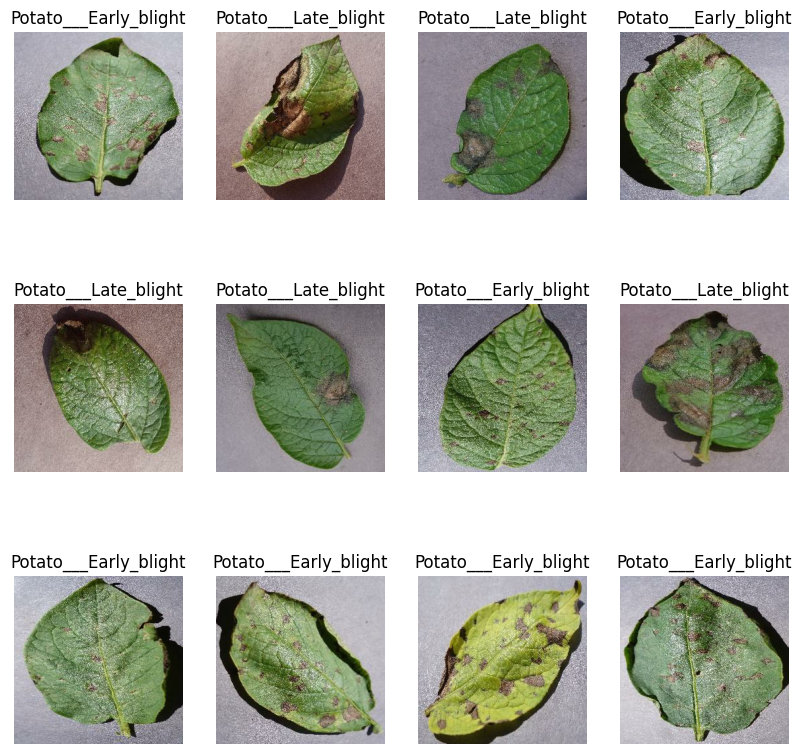

In [10]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [11]:
len(dataset)

71

In [12]:
train_size = 0.8
len(dataset)*train_size

56.800000000000004

In [13]:
train_ds = dataset.take(54)
len(train_ds)

54

In [14]:
test_ds = dataset.skip(54)
len(test_ds)

17

In [15]:
val_size = 0.1
len(dataset)*val_size

7.1000000000000005

In [16]:
test_ds = test_ds.skip(6)
len(test_ds)

11

In [17]:
def get_dataset_paritions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds = get_dataset_paritions_tf(dataset)

In [19]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

56
7
8


In [24]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [25]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])


In [27]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])


In [34]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape = input_shape)

In [35]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (32, 4)                │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=False),  # Use directly
    metrics=['accuracy']
)


In [37]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 806ms/step - accuracy: 0.4246 - loss: 1.1505 - val_accuracy: 0.4651 - val_loss: 1.0661
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 804ms/step - accuracy: 0.4903 - loss: 1.0357 - val_accuracy: 0.6465 - val_loss: 0.8272
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 798ms/step - accuracy: 0.6833 - loss: 0.8132 - val_accuracy: 0.6977 - val_loss: 0.7426
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 44s 778ms/step - accuracy: 0.7427 - loss: 0.7050 - val_accuracy: 0.7395 - val_loss: 0.6868
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 805ms/step - accuracy: 0.7688 - loss: 0.6605 - val_accuracy: 0.7349 - val_loss: 0.6118
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 751ms/step - accuracy: 0.7817 - loss: 0.6094 - val_accuracy: 0.8140 - val_loss: 0.4653
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 755ms/step - accuracy: 0.8596 - loss: 0.4552 - val_accuracy: 0.8884 - val_loss: 0.3993
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 761ms/step - accuracy: 0.8635 - loss: 0.4335 - val_accu

In [38]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - accuracy: 0.8523 - loss: 0.5103


In [39]:
scores

[0.45931458473205566, 0.8542510271072388]

In [40]:
history

In [41]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 56}

In [42]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [43]:
history.history['accuracy']

[0.43858665227890015,
 0.5429052114486694,
 0.6887268424034119,
 0.7436904311180115,
 0.7689287662506104,
 0.7958496809005737,
 0.8536174893379211,
 0.8676388263702393,
 0.8878294825553894,
 0.8951205611228943]

In [44]:
len(history.history['accuracy'])

10

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

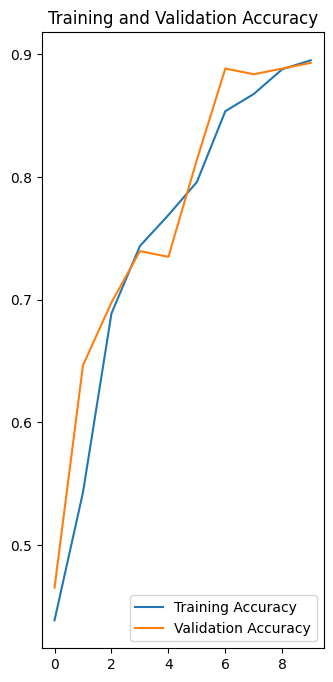

In [46]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label = "Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label = "Validation Accuracy")
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')



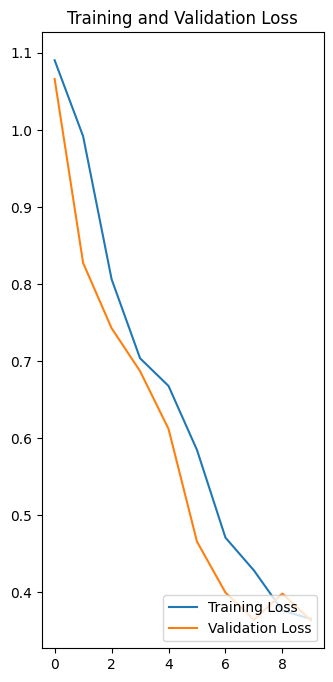

In [47]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label = "Training Loss")
plt.plot(range(EPOCHS), val_loss, label = "Validation Loss")
plt.legend(loc = 'lower right')
plt.title('Training and Validation Loss')

plt.show()

In [48]:
import numpy as np
np.argmax([1.0000000e+00,  3.9739151e-10,  9.0474796e-26])

np.int64(0)

First Image  to Predict
first image's actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
Predicted Label : Potato___Early_blight


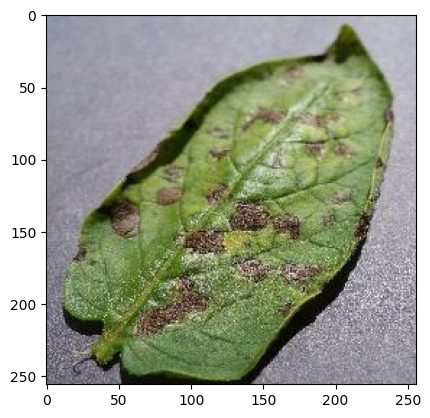

In [49]:
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]

    print("First Image  to Predict")
    plt.imshow(first_image)
    print("first image's actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("Predicted Label :",class_names[np.argmax(batch_prediction[0])])

In [50]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)  #Create a Batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


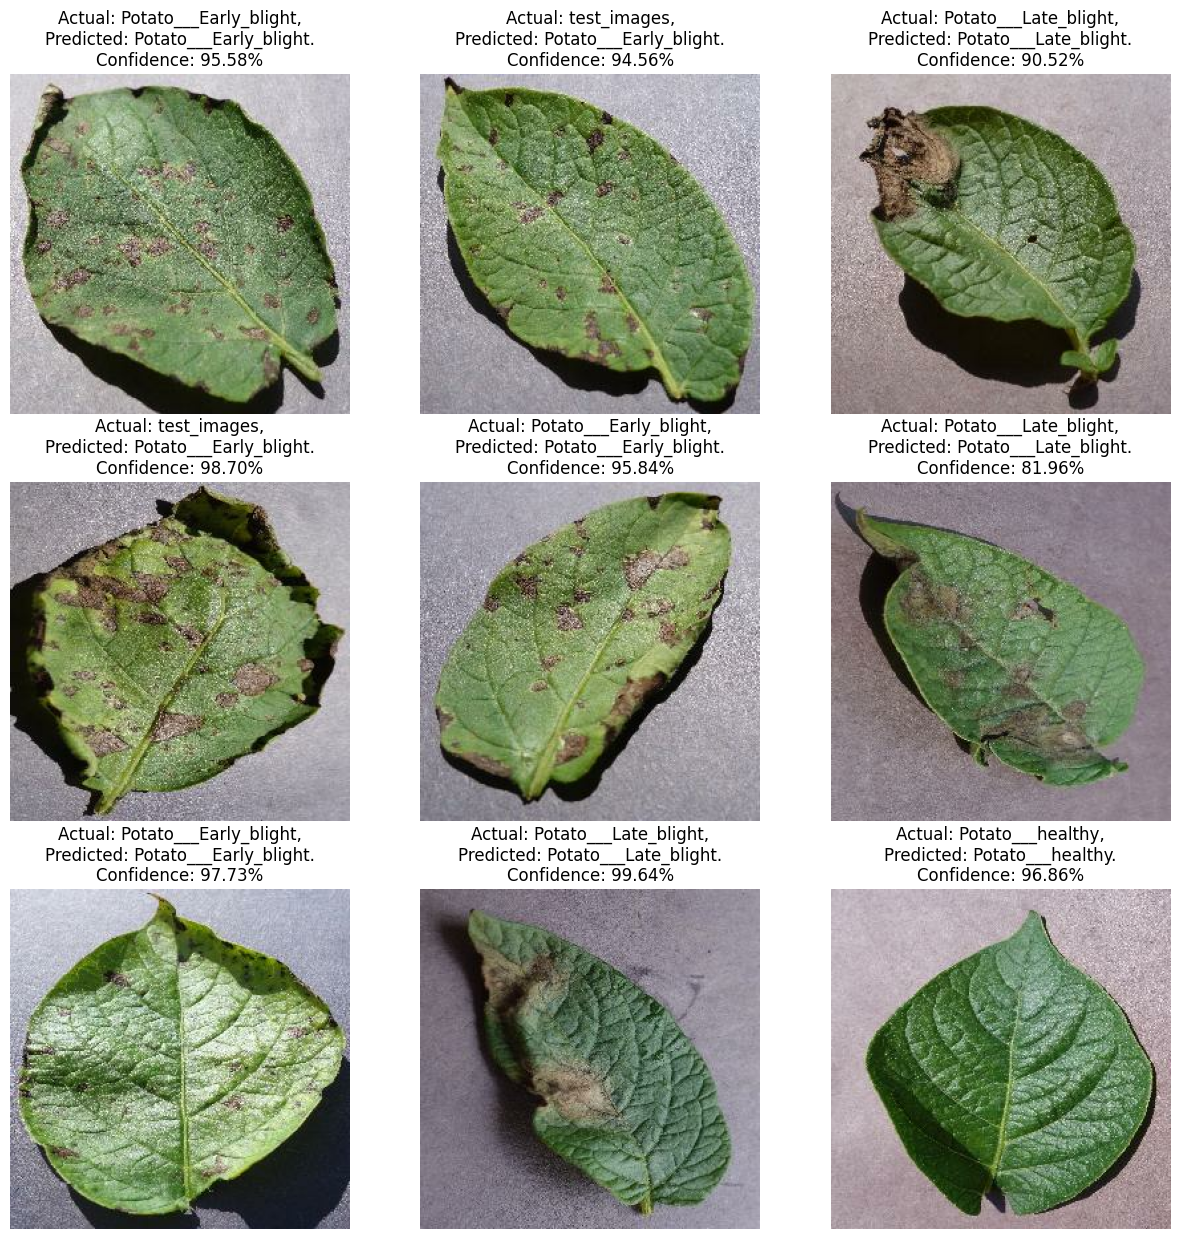

In [51]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):  # Assuming test_ds is your test dataset
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # Predict the class probabilities
        predictions = model.predict(np.expand_dims(images[i], axis=0))  # Add batch dimension
        predicted_class = class_names[np.argmax(predictions)]  # Get the class with the highest probability
        confidence = 100 * np.max(predictions)  # Confidence as percentage

        actual_class = class_names[labels[i].numpy()]  # Convert label to class name

        # Set title with actual class, predicted class, and confidence
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class}.\nConfidence: {confidence:.2f}%")
        plt.axis("off")


In [52]:
model.save("potato1_model.h5")
print("Model saved successfully as potato1_model.h5!")

Model saved successfully as potato1_model.h5!
